# DSCI 523 Lab Assignment 1 

## Introduction to programming with R for data manipulation

## Lab Mechanics
rubric={mechanics:5}

- All files necessary to run your work must be pushed to your GitHub.ubc.ca repository for this lab.
- You need to have a minimum of 3 commit messages associated with your GitHub.ubc.ca repository for this lab.
- You must also submit `.ipynb` file OR the `zip` file generated at the last step (under Submission heading) in this worksheet/lab to Gradescope. Entire notebook must be executed so the TA's can see the results of your work. 
- **There is autograding in this lab, so please do not move or rename this file. Also, do not copy and paste cells, if you need to add new cells, create new cells via the "Insert a cell below" button instead.**
- Follow the [MDS general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/). 

### Getting your homework (i.e., worksheet and lab repositories) from GitHub.ubc.ca onto MDS's JuypterHub

Watch the video titled "Downloading the lab assignment from GitHub to JupyterLab" from DSCI 521, accessible [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_521_platforms-dsci_students/materials/appendices/submit-assignment.html).

## Code Quality
rubric={quality:5}

The code that you write for this assignment will be given one overall grade for code quality, see our code quality rubric as a guide to what we are looking for. Also, for this course (and other MDS courses that use R), we are trying to follow the tidyverse code style. There is a guide you can refer too: http://style.tidyverse.org/

Each code question will also be assessed for code accuracy (i.e., does it do what it is supposed to do?).

## Table of contents

1. [Exercise 1: Reading data into R](#Exercise-1:-Reading-data-into-R)

2. [Exercise 2: Data wrangling with {dplyr}](#Exercise-2:-Data-wrangling-with-{dplyr})

3. [Exercise 3: More data wrangling with {dplyr}](#Exercise-3:-More-data-wrangling-with-{dplyr})

4. [Exercise 4: Tidying data with {tidyr}](#Exercise-4:-Tidying-data-with-{tidyr})

5. [Exercise 5: Tidying more data with {tidyr}](#Exercise-5:-Tidying-more-data-with-{tidyr})

6. [Exercise 6: Subsetting with base R](#Exercise-6:-Subsetting-with-base-R)

7. [Exercise 7: (Optional)](#Exercise-7:-(Optional))

8. [Submission instructions](#Submission)

Run the cell below to load the libraries needed for this lab, as well as the test file so you can check your answers as you go!

In [1]:
library(canlang)
library(readxl)
library(repurrrsive)
library(testthat)
library(tidyverse)
options(repr.matrix.max.rows = 10)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::edition_get()   masks testthat::edition_get()
✖ dplyr::filter()        masks stats::filter()
✖ purrr::is_null()       masks testthat::is_null()
✖ dplyr::lag()           masks stats::lag()
✖ readr::local_edition() masks testthat::local_edition()
✖ dplyr::matches()       masks tidyr::matches(), testthat::matches()


## Exercise 1: Reading data into R

Reading data into R is so essential, that we need to get really good at it so it's not a bottleneck in our workflow! Here's some more practice for you! Read the data files listed in the table below and and bind the names listed in the table to them. We will use hidden tests to grade this, so you will get to practice deciding that your job is done, and done correctly. 

**Note - if the column names are missing from any data sets you need to add them yourself programmatically via R** (see `col_names` arguement of the `read_*` functions).


| File  | Object name to bind to the data frame | File location |
|---|---|----|
| `abbotsford_lang.xlsx`  | `abbotsford` | `data` directory of this repo |
| `calgary_lang.csv`  | `calgary`  | `data` directory of this repo |
| `edmonton_lang.xlsx`  | `edmonton`  | https://github.com/ttimbers/canlang/blob/master/inst/extdata/edmonton_lang.xlsx?raw=true |
|  `kelowna_lang.csv` | `kelowna`  | `data` directory of this repo |
| `vancouver_lang.csv`  | `vancouver`  | `data` directory of this repo |
| `victoria_lang.csv`  | `victoria`  | https://github.com/ttimbers/canlang/raw/master/inst/extdata/victoria_lang.tsv |

> #### The data
> The data you will be working with in this first exercise is language data from the 2016 Canadian Census for cities in Western Canada. If you are unfamiliar with Western Canadian geography, here's a map to help you start to get more familiar:
>
> <img src="https://www.canadatours.com/images/maps/Canada_W.gif" width=500>
>
> *Image source: https://www.canadatours.com/canada_maps.cfm?#W*

#### Read in the Abbotsford language data:
rubric={autograde:5}

In [2]:
abbotsford <- NULL
# BEGIN SOLUTION NO PROMPT
abbotsford <- read_excel("data/abbotsford_lang.xlsx", sheet = "data")
# END SOLUTION
head(abbotsford)

category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",5,5,0,0
Non-Official & Non-Aboriginal languages,Afrikaans,135,75,0,285
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",0,0,0,10
Non-Official & Non-Aboriginal languages,Akan (Twi),15,0,0,15
Non-Official & Non-Aboriginal languages,Albanian,80,25,0,140
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [3]:
# HIDDEN
expect_equal(nrow(abbotsford), 214)
expect_equal(ncol(abbotsford), 6)
expect_equal(paste(tolower(sort(colnames(abbotsford))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(abbotsford$mother_tongue, na.rm = TRUE))), 173570)

#### Read in the Calgary language data:
rubric={autograde:5}

In [4]:
calgary <- NULL
# BEGIN SOLUTION NO PROMPT
calgary <- read_csv("data/calgary_lang.csv")
# END SOLUTION
head(calgary)

Rows: 214 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): category, language
dbl (4): mother_tongue, most_at_home, most_at_work, lang_known

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",20,5,0,15
Non-Official & Non-Aboriginal languages,Afrikaans,960,505,15,1955
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",45,15,0,170
Non-Official & Non-Aboriginal languages,Akan (Twi),705,330,0,1150
Non-Official & Non-Aboriginal languages,Albanian,1365,620,25,1735
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [5]:
# HIDDEN
expect_equal(nrow(calgary), 214)
expect_equal(ncol(calgary), 6)
expect_equal(paste(tolower(sort(colnames(calgary))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(calgary$mother_tongue, na.rm = TRUE))), 1341120)

#### Read in the Edmonton language data:
rubric={autograde:5}

In [6]:
edmonton <- NULL
# BEGIN SOLUTION NO PROMPT
url <- "https://github.com/ttimbers/canlang/blob/master/inst/extdata/edmonton_lang.xlsx?raw=true"
download.file(url, destfile = "data/edmonton.xlsx")
edmonton <- read_excel("data/edmonton.xlsx", sheet = "data")
# END SOLUTION
head(edmonton)

category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",25,10,0,0
Non-Official & Non-Aboriginal languages,Afrikaans,575,300,0,1220
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",65,20,0,155
Non-Official & Non-Aboriginal languages,Akan (Twi),885,445,0,1435
Non-Official & Non-Aboriginal languages,Albanian,770,370,10,885
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [7]:
# HIDDEN
expect_equal(nrow(edmonton), 214)
expect_equal(ncol(edmonton), 6)
expect_equal(paste(tolower(sort(colnames(edmonton))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(edmonton$mother_tongue, na.rm = TRUE))), 1273005)

#### Read in the Kelowna language data:
rubric={autograde:5}

In [8]:
kelowna <- NULL
# BEGIN SOLUTION NO PROMPT
kelowna <- read_csv2("data/kelowna_lang.csv", skip = 6, n_max = 214, 
                     col_names = c("category", "language",
                                   "mother_tongue", "most_at_home",
                                   "most_at_work", "lang_known"))
# END SOLUTION
head(kelowna)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 214 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
chr (2): category, language
dbl (4): mother_tongue, most_at_home, most_at_work, lang_known

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,10
Non-Official & Non-Aboriginal languages,Afrikaans,175,75,0,280
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",5,0,0,0
Non-Official & Non-Aboriginal languages,Akan (Twi),5,0,0,30
Non-Official & Non-Aboriginal languages,Albanian,30,10,0,20
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [9]:
# HIDDEN
expect_equal(nrow(kelowna), 214)
expect_equal(ncol(kelowna), 6)
expect_equal(paste(tolower(sort(colnames(kelowna))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(kelowna$mother_tongue, na.rm = TRUE))), 190845)

#### Read in the Vancouver language data:
rubric={autograde:5}

In [10]:
vancouver <- NULL
# BEGIN SOLUTION NO PROMPT
vancouver <- read_csv("data/vancouver_lang.csv")
# END SOLUTION
head(vancouver)

Rows: 214 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): category, language
dbl (4): mother_tongue, most_at_home, most_at_work, lang_known

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",70,15,0,35
Non-Official & Non-Aboriginal languages,Afrikaans,1435,520,10,4225
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",45,10,0,95
Non-Official & Non-Aboriginal languages,Akan (Twi),400,125,10,495
Non-Official & Non-Aboriginal languages,Albanian,1090,530,10,1135
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [11]:
# HIDDEN
expect_equal(nrow(vancouver), 214)
expect_equal(ncol(vancouver), 6)
expect_equal(paste(tolower(sort(colnames(vancouver))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(vancouver$mother_tongue, na.rm = TRUE))), 2361925)

#### Read in the Victoria language data:
rubric={autograde:5}

In [12]:
victoria <- NULL
# BEGIN SOLUTION NO PROMPT
victoria <- read_tsv("https://raw.githubusercontent.com/ttimbers/canlang/master/inst/extdata/victoria_lang.tsv")
# END SOLUTION
head(victoria)

Rows: 214 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): category, language
dbl (4): mother_tongue, most_at_home, most_at_work, lang_known

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


category,language,mother_tongue,most_at_home,most_at_work,lang_known
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aboriginal languages,"Aboriginal languages, n.o.s.",10,0,0,25
Non-Official & Non-Aboriginal languages,Afrikaans,175,50,0,580
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",0,0,0,20
Non-Official & Non-Aboriginal languages,Akan (Twi),20,0,0,0
Non-Official & Non-Aboriginal languages,Albanian,125,70,0,145
Aboriginal languages,"Algonquian languages, n.i.e.",0,0,0,0


In [13]:
# HIDDEN
expect_equal(nrow(victoria), 214)
expect_equal(ncol(victoria), 6)
expect_equal(paste(tolower(sort(colnames(victoria))), collapse = ""), 'categorylang_knownlanguagemost_at_homemost_at_workmother_tongue')
expect_equal(round(as.numeric(sum(victoria$mother_tongue, na.rm = TRUE))), 357030)

## Exercise 2: Data wrangling with {dplyr}
rubric={autograde:10}

You have loaded individual data sets for 6 Western Canadian cities above, but we have more data than that from the 2016 Canadian Census (the most recent Canadian Census, the next one is scheduled for 2021). The {[canlang](https://ttimbers.github.io/canlang/)} R data package has language and regional data for all census metropolitan areas in Canada!

<img src="https://github.com/ttimbers/canlang/blob/master/man/figures/hex-canlang.png?raw=true" width=100>

For this exercise, we want you to use the {dplyr} functions you have already met in this course and the {canlang} R package `region_lang` data set to uncover the name of the Canadian census metropolitan area which has the second most number of people who claim that they language they speak most often at home is Mandarin. Return the region name as a **character vector of length 1** (i.e., make sure it is not a data frame with one value in it). Bind the name `mandarin2` to the final object you return.

In [14]:
mandarin2 <- NULL
# BEGIN SOLUTION NO PROMPT
mandarin2 <- region_lang %>% 
    filter(language == "Mandarin") %>% 
    arrange(desc(most_at_home)) %>% 
    slice(2) %>% 
    select(region) %>% 
    pull()
# END SOLUTION
mandarin2

[1] "Vancouver"

In [15]:
expect_equal(class(mandarin2), 'character')

In [16]:
# HIDDEN
expect_equal(mandarin2, 'Vancouver')
expect_equal(length(mandarin2), 1)
expect_equal(class(mandarin2), 'character')

## Exercise 3: More data wrangling with {dplyr}
rubric={accuracy:20}

For this exercise, we want you to choose a Canadian census metropolitan area from the {canlang} R package `region_lang` data set, and use the {dplyr} functions that you have already met in this course to find the top 5 languages spoken most often at home from that area. Your final result should be a data frame with two columns:
1. `language`
2. `perc_pop` 

The column `perc_pop` should be the percentage of the area's population who reported that they speak that language most often at home. You can find the population size for each Canadian census metropolitan area in the  {canlang} R package `region_data` data set. 

In [17]:
# BEGIN SOLUTION NO PROMPT
ottawa_pop <- region_data %>% 
    filter(region == "Ottawa - Gatineau") %>% 
    select(population) %>% 
    pull()

ottawa_top5_langs <- region_lang %>% 
    filter(region == "Ottawa - Gatineau") %>% 
    arrange(desc(most_at_home)) %>% 
    slice(1:5) %>% 
    select(language, most_at_home) %>% 
    mutate(perc_pop = round(most_at_home / ottawa_pop * 100)) %>% 
    select(-most_at_home)

ottawa_top5_langs
# END SOLUTION

language,perc_pop
<chr>,<dbl>
English,58
French,27
Arabic,2
Mandarin,1
Spanish,1


## Exercise 4: Tidying data with {tidyr}
rubric={autograde:10}

We're going to shift to a different data set to practice making data frames wider and longer, as the {canlang} data sets are already pretty tidy. Let's load a data set that is not tidy, because it is too wide for the statistical question being asked, and then use one of the {tidyr} functions to tidy it.

This next data set that we will be looking at contains environmental data from 1914 to 2018. The data was collected by the DFO (Canada's Department of Fisheries and Oceans) at the Pacific Biological Station (Departure Bay). Daily sea surface temperatures were recorded. Original data source: http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/lightstations-phares/index-eng.html

A statistical question we might be interested in answering with this data set is, has sea surface temperature been changing over time, and is there an association between time of year (i.e., month) and this change over time? Read the `departure_bay_temperature.csv` data set in from the `data` directory and decide what tidying you will have to do, and then get to work and tidy it! 

Bind the name `tidy_temps` to the tidy data frame you create. Name the second column name to be `month` & third column name to be `temp`.

In [18]:
# BEGIN SOLUTION NO PROMPT
tidy_temps <- read_csv("data/departure_bay_temperature.csv", skip = 2) %>% 
    pivot_longer(cols = Jan:Dec, names_to = "month", values_to = "temp")
# END SOLUTION
tidy_temps

Rows: 105 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,month,temp
<dbl>,<chr>,<dbl>
1914,Jan,7.2
1914,Feb,NA
1914,Mar,NA
1914,Apr,NA
1914,May,NA
⋮,⋮,⋮
2018,Aug,NA
2018,Sep,NA
2018,Oct,NA


In [19]:
expect_equal(ncol(tidy_temps), 3)

In [20]:
# HIDDEN
expect_equal(nrow(tidy_temps), 1260)
expect_equal(ncol(tidy_temps), 3)
expect_equal(paste(tolower(sort(colnames(tidy_temps))), collapse = ""), 'monthtempyear')
expect_equal(round(as.numeric(sum(tidy_temps$temp, na.rm = TRUE))), 10508)

As a reward for your hard work, let's take a look and see whether sea surface temperature been changing over time at Departure Bay, BC. Given that time of year is a factor that influences temperature, we'll plot this for each month separately:

Warning message:
“Removed 86 rows containing missing values (geom_point).”


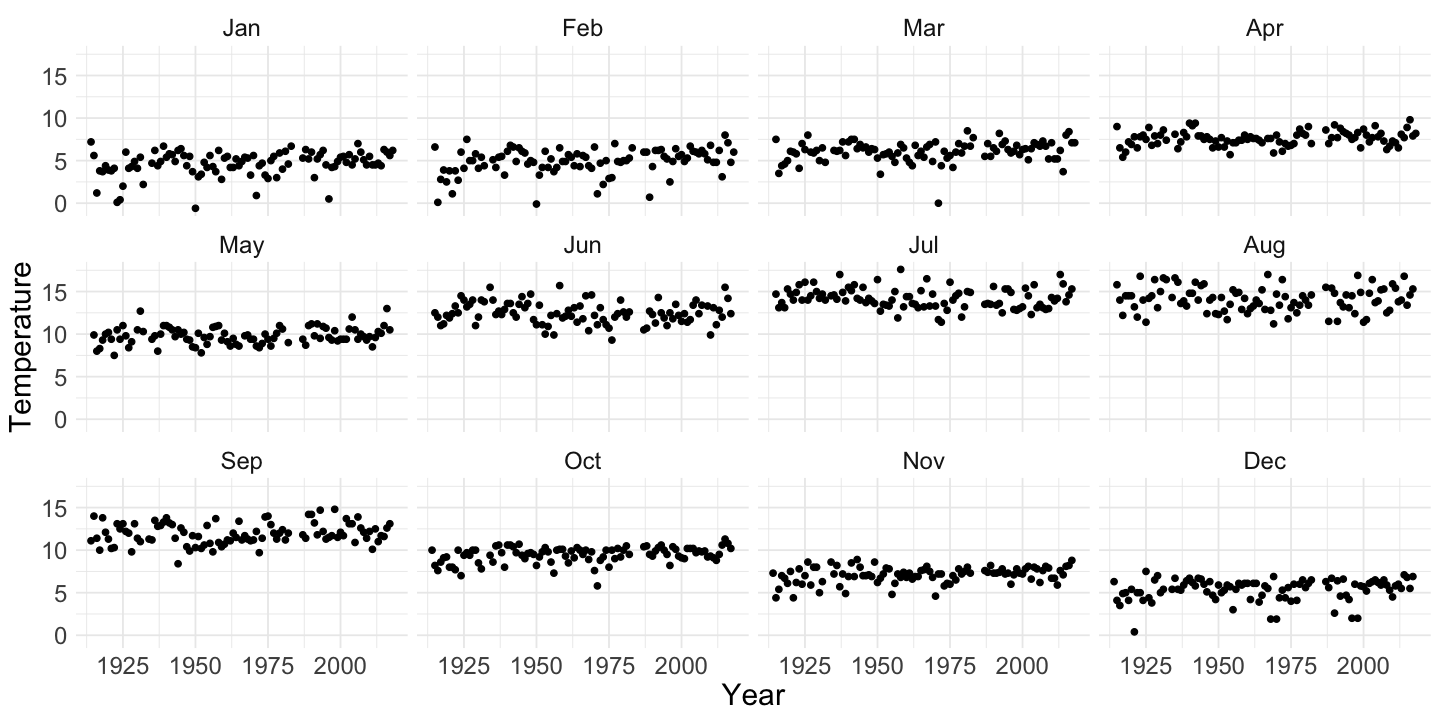

In [21]:
options(repr.plot.width = 12, repr.plot.height = 6)
temps_plot <- tidy_temps %>% 
    ggplot(aes(x = Year, y = temp)) + 
    geom_point() + 
    facet_wrap(~ factor(month, levels = c("Jan","Feb","Mar","Apr","May","Jun",
                                          "Jul","Aug","Sep","Oct","Nov","Dec"))) +
    xlab("Year") + 
    ylab("Temperature") +
    theme_minimal() +
    theme(legend.position = "bottom",
          legend.background = element_rect(fill = "white", color = NA),
          plot.title.position = "plot",
          plot.caption = element_text(hjust = 0, face= "italic"),
          plot.caption.position = "plot",
          text = element_text(size = 18))
temps_plot

## Exercise 5: Tidying more data with {tidyr}
rubric={autograde:10}

Use one of the {tidyr} functions to tidy the data that you will load in from the `language_diversity.csv` file located in the `data` directory. This data was collected to answer research questions, such as what factors are associated with language diversity (as measured by the number of languages spoken in a country).  Read the `language_diversity.csv` data set into R and decide what tidying you will have to do, and then get to work and tidy it! Bind the name `tidy_lang` to the tidy data frame you create.

Data source: https://www.jvcasillas.com/untidydata/

In [22]:
tidy_lang <- NULL
# BEGIN SOLUTION NO PROMPT
tidy_lang <- read_tsv("data/language_diversity.csv") %>% 
    pivot_wider(names_from = "Measurement", values_from = "Value")
# END SOLUTION
head(tidy_lang)

Rows: 444 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Continent, Country, Measurement
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Continent,Country,Langs,Area,Population,Stations,MGS,Std
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,18,2381741,25660,102,6.60,2.29
Africa,Angola,42,1246700,10303,50,6.22,1.87
Oceania,Australia,234,7713364,17336,134,6.00,4.17
Asia,Bangladesh,37,143998,118745,20,7.40,0.73
Africa,Benin,52,112622,4889,7,7.14,0.99
Americas,Bolivia,38,1098581,7612,48,6.92,2.50


In [23]:
expect_equal(ncol(tidy_lang), 8)

In [24]:
# HIDDEN TESTS
expect_equal(nrow(tidy_lang), 74)
expect_equal(ncol(tidy_lang), 8)
expect_equal(paste(tolower(sort(colnames(tidy_lang))), collapse = ""), 'areacontinentcountrylangsmgspopulationstationsstd')
expect_equal(round(as.numeric(sum(tidy_lang$Langs, na.rm = TRUE))), 6640)

Now that we have this data in a tidy format, let's explore it and plot the number of languages spoken in each country in the data set against the country's population:

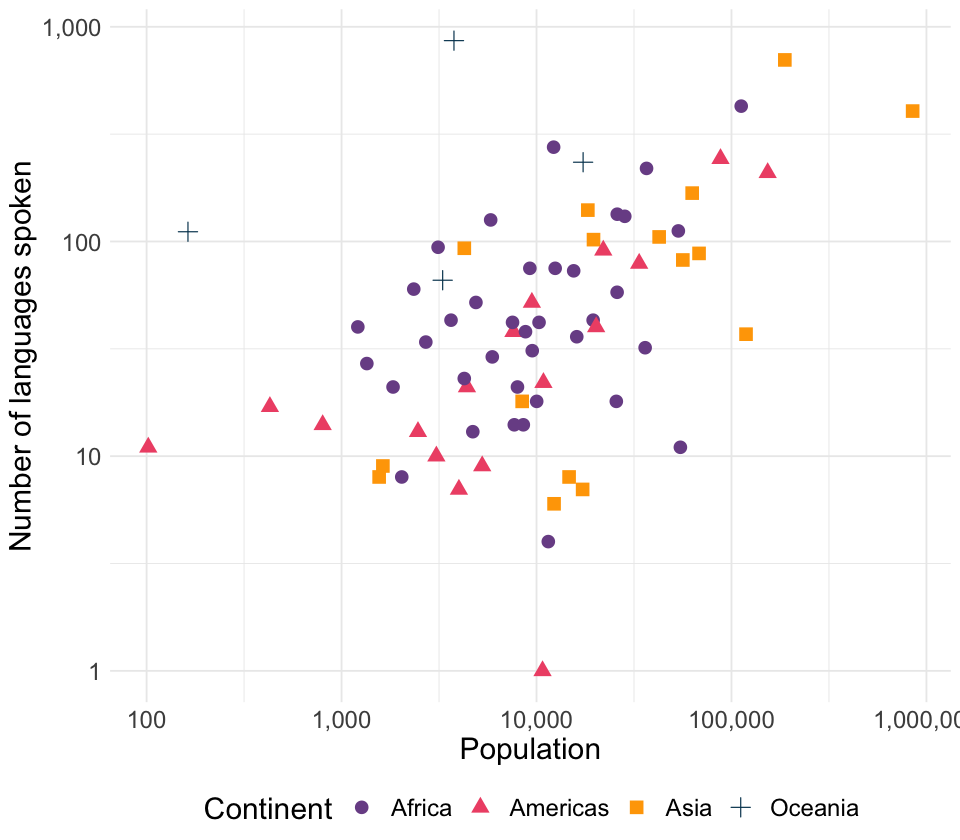

In [25]:
options(repr.plot.width = 8, repr.plot.height = 7)
lang_plot <- ggplot(tidy_lang, aes(x = Population, y = Langs, colour = Continent, shape = Continent)) +
    geom_point(size = 3.5) +
    scale_color_manual(values = c("#7a5195", "#ef5675", "#ffa600", "#003f5c")) +
    scale_y_log10(name = "Number of languages spoken", 
                       labels = scales::comma) +
    scale_x_log10(name = "Population", 
                       labels = scales::comma) +
    theme_minimal() +
    theme(legend.position = "bottom",
          legend.background = element_rect(fill = "white", color = NA),
          plot.title.position = "plot",
          plot.caption = element_text(hjust = 0, face= "italic"),
          plot.caption.position = "plot",
          text = element_text(size = 18))
lang_plot

## Exercise 6: Subsetting with base R

The {tidyverse} functions were written for manipulating data frames and vectors, but you now know that there are other types of objects in R. To work with these kinds of objects we need to know how to do subsetting using base R. Lets get some more practice doing this first with matrices and lists! 

### Subsetting matrices
rubric={autograde:5}

Consider the matrix created below, subset a smaller matrix that is the 10 - 15 colums and 1 - 5 rows. Bind the name `small_matrix` to it:

In [26]:
set.seed(2020) # this makes the random number process below reproducible
random_matrix <- matrix(rexp(200, rate=.1), ncol=20)
random_matrix

2.938057,6.5233139,11.135525330,1.431066,1.1601004,12.6860753,16.4134368,37.611580,2.8760736,11.9359657,10.1429664,3.7368253,14.1535378,2.5883681,1.70020847,7.641389,3.507495,27.733644,0.7635843,1.492056
12.700502,13.8406351,4.961900343,11.788127,2.2866390,12.1997007,3.7501219,25.521498,0.3410495,3.6322129,1.4065676,0.3350206,0.3627339,18.7108811,2.86708585,7.827604,8.398940,11.501245,1.4928199,5.637580
2.370036,13.3029784,10.784506729,17.122631,2.6865893,17.6286187,8.7758532,13.049184,6.4395061,18.4997913,7.9907373,1.4970579,8.0956285,6.8583796,8.32895351,4.377994,40.051038,8.110950,3.8880998,39.920596
7.398545,0.7938523,22.229445818,1.575422,0.6059261,14.6876833,4.5239944,8.346802,11.6813587,21.2545254,0.2040772,2.8268398,17.7621596,0.2964559,0.08151982,9.872077,16.677610,41.162820,14.2382275,47.132323
14.195153,3.7895417,0.008232868,8.462461,8.7432093,18.0210972,1.1309803,10.524262,13.6747683,14.1242168,0.5155448,18.2741893,5.4473414,2.3499926,14.54604977,25.113806,3.571127,11.366806,3.4441976,2.572980
12.656189,7.5740144,11.622642902,3.614166,8.4369874,11.1485233,3.6596141,1.719779,17.3328534,1.4198751,26.6164124,11.9498316,0.2640172,5.2254129,1.49033928,15.709789,1.919996,13.510032,14.9959522,5.366673
58.675191,19.6065916,45.720541661,56.452869,32.3882064,5.9444357,5.7199025,33.945311,1.3362299,0.3681266,3.9765598,5.0458668,4.1642927,20.2440382,4.38639193,30.591778,12.794629,2.770155,4.5837962,19.566883
2.404119,23.2537627,1.538694979,8.486318,6.3638649,0.1769528,0.9452913,3.676081,38.7291467,4.1329050,4.4178181,17.7528238,4.1940696,6.7261254,1.18011127,22.963183,12.437981,22.577034,29.8337177,1.638553
5.288280,6.3678666,1.561867743,8.374958,26.4357742,18.5346461,6.8387739,6.605413,0.2980290,4.7021308,20.8172305,8.8334537,13.5828541,21.4938658,4.78286147,12.663138,14.105986,22.403308,5.4939446,36.781060
4.876715,1.1497813,2.496821731,11.185452,9.2018113,4.9077449,0.9648821,2.156965,2.6015399,13.9129809,0.1818018,35.1253667,2.3546730,16.9889198,0.82372545,26.525397,3.740227,2.702319,12.9271982,11.044500


In [27]:
small_matrix <- NULL
# BEGIN SOLUTION NO PROMPT
small_matrix <- random_matrix[1:5, 10:15]
# END SOLUTION
small_matrix

11.935966,10.1429664,3.7368253,14.1535378,2.5883681,1.70020847
3.632213,1.4065676,0.3350206,0.3627339,18.7108811,2.86708585
18.499791,7.9907373,1.4970579,8.0956285,6.8583796,8.32895351
21.254525,0.2040772,2.8268398,17.7621596,0.2964559,0.08151982
14.124217,0.5155448,18.2741893,5.4473414,2.3499926,14.54604977


In [28]:
# HIDDEN
expect_equal(nrow(small_matrix), 5)
expect_equal(ncol(small_matrix), 6)
expect_true('matrix' %in% class(small_matrix))
expect_equal(round(as.numeric(sum(small_matrix[1], na.rm = TRUE))), 12)

### Subsetting lists
rubric={autograde:5}

Now we will work with a list from the {[repurrrsive](https://github.com/jennybc/repurrrsive)} R data package, specifically a data set about Game of Thrones characters named `got_chars`.

In [29]:
# uncomment the line below and run this cell to view the got_chars data set
# glimpse(got_chars)

Now, from this list, extract the name of the 9th character in this list, as a character vector (not a list). 

In [30]:
got_char_9 <- NULL
# BEGIN SOLUTION NO PROMPT
got_char_9 <- got_chars[[9]]$name
# END SOLUTION
got_char_9

[1] "Daenerys Targaryen"

In [31]:
# HIDDEN
expect_equal(class(got_char_9), 'character')
expect_equal(got_char_9, 'Daenerys Targaryen')

## Exercise 7: (Optional)
(not graded - for practice only)

Answer either question below for this **optional** exercise:

### Explore the `region_lang` data set

Write a question that you can answer with the `region_lang` data set and the {dplyr} functions you have met so far. Then use R to answer the question with code. Also write 2-3 sentences stating your answer in written english. 

### Create another tidy data example

Write a research question you would be interested in answering, and create a small, fake data set that you could use to answer that question. Present the fake data in 3 different formats, two of which that are **not** tidy, as well as one which is tidy. Label which versions of the data set are tidy and which are not. Provide a 1-2 sentence explanation why each version of the data set is tidy or not.

Congratulations! You are done the lab!!! Pat yourself on the back, and submit your worksheet to Gradescope!

<img src="img/r_first_then.png" width=300>